# **1. Why A/B is required for the company?**
Before going to why A/B testing is required. Let’s first know, What is A/B testing? What to do using A/B testing? What are the benefits of doing A/B testing?

##The answer to our main question lies in these questions.

A/B testing refers to a process of experimentation randomly wherein two or more versions of a variable like web page, page element, etc. are shown to different segments of website visitors or users at the same time to determine which version leaves the maximum impact and drive business metrics.

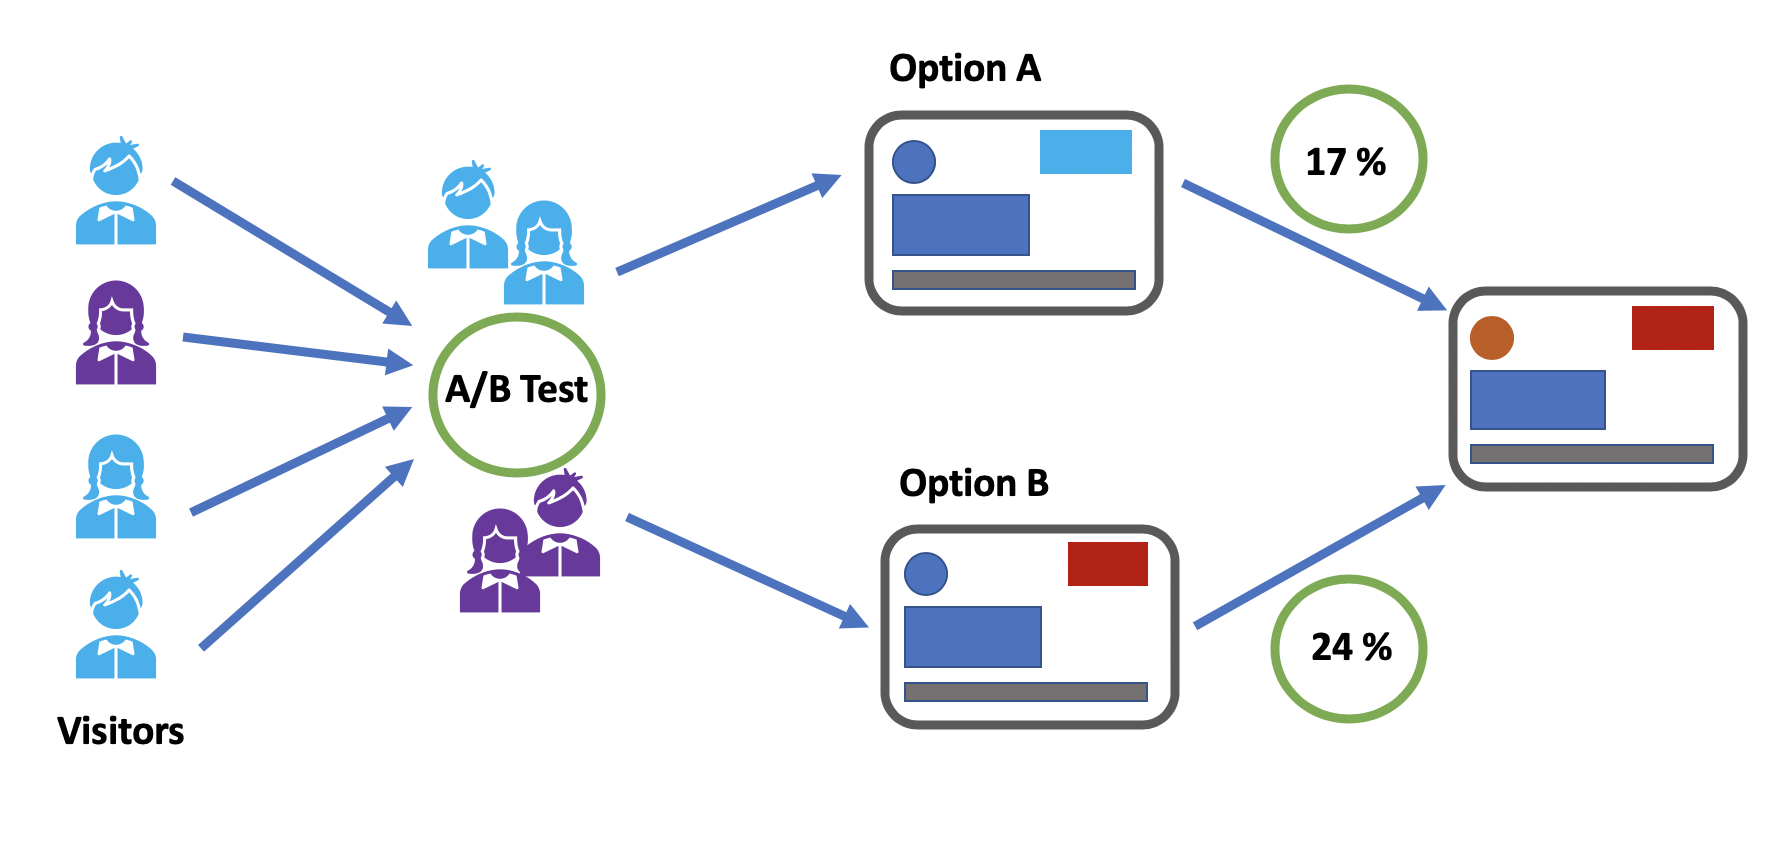

Essentially, A/B testing eliminates all the guesswork out of website optimization and enables experience optimizers to make data-backed decisions. In A/B testing, A refers to ‘control’ or the original testing variable. Whereas B refers to ‘variation’ or a new version of the original testing variable.

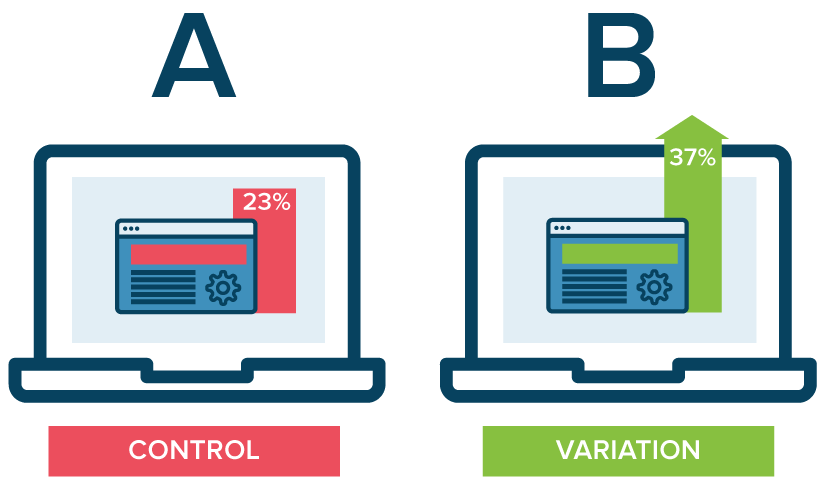

## A/B Testing is of the following types:

1.	Split Testing
2.	Conversion Rate Optimization
3.	Multi-Variate Testing
4.	Landing Page Optimization
5.	Digital Optimization
6.	Online Experimentation
7.	Growth Hacking

## We can perform the A/B test on the following:

1.	Site Pages, Flow, and Elements
2.	Business Model
3.	Backend Functionality and Algorithms
4.	New Products or Services

## The benefits of using A/B tests are as follows:

1.	Increase Revenue and Conversions
2.	Rapid Iteration
3.	Learn what works
4.	Uses Actual Site Visitors
5.	Data-Driven Decision Making

## As we have seen lots of company applications and benefits to the company using this test. So, A/B testing is pretty much required for the company for a rapid expansion of that company.




# **2. Steps involved in A/B testing.**

 Those steps are as follows:

1.	**Get a Testing Tool:** Select the type of test from the above-mentioned type lists.
2.	**Define Primary Success Metric:** The metric we can take from Bounce Rate, Exit Rate, Engagement metrics here.
3.	**Define Idea/ Question/ Hypothesis/ Experiments To be tested:** Creation of the hypothesis you need to test. For example, no. of 3% will increase and so on.
4.	**Define Variations and Learning:** Set the variation pattern
5.	**Create the Variations:** Creat the pattern and structure.
6.	**Measure and Activate:** Activate for an experiment basis for a shorter time and analyze the improvement.
7.	**Analyze the Results:** Calculate the Results using Metrics.
8.	**Document Learning & Evangelize:** Publish the variation.
9.	**Ideation/ Implementation/ Deployment:** If there is an expansion or increment seen in steps no. 6 & 7, deploy that or go to the next step.
10.	**Repeat**

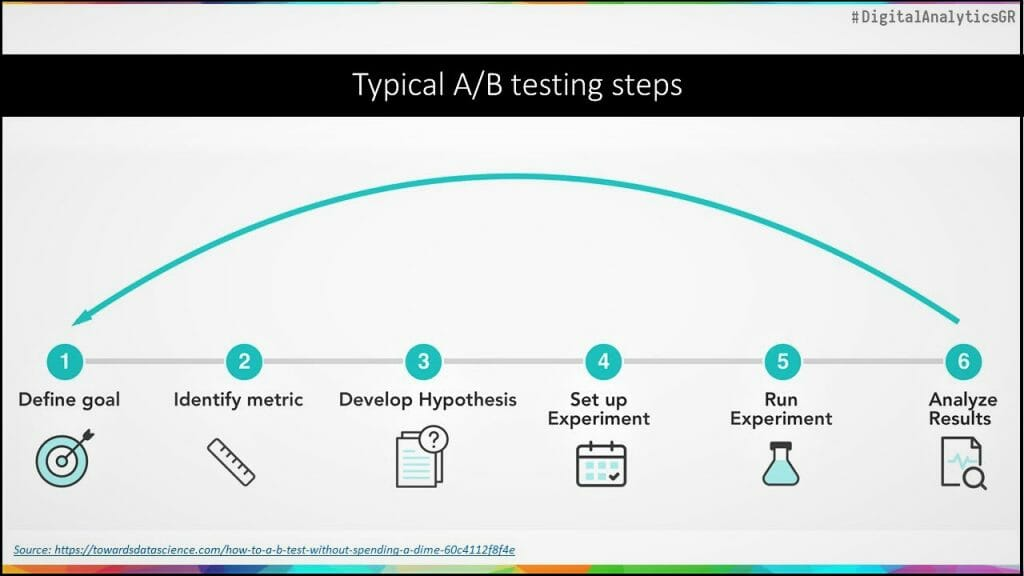


# **3. Design a hypothetical scenario where A/B testing will be applied.**

"Growdataskills" is an online learning platform that offers a wide variety of courses, degrees, and certifications to students. So, the customer funnel for a typical new user on the Growdataskills website would be as follows:

**Homepage -> Explore Courses -> View Course Overview page -> Enroll in course -> Complete the Course**

Growdataskills decided to test features that can increase student engagement. Growdataskills is performing an A/B test to try out changes that will hopefully increase the conversion rate from one stage to the next.

So, They decided to change the homepage design first. Growdataskills decided to optimize its homepage to attract more students to learn from it. The more engaging design will increase the number of users to explore their courses.

This covers two stages of the funnel, **Homepage -> Explore Courses**

An experiment was set up to see how many users went to the next stage of exploring courses in the funnel in both the control and treatment groups. The metric **Click-through rate(CTR)** for the “Explore Courses” button on the Homepage was then chosen to measure the level of **engagement** from the users in each group.

The null hypothesis here is the new CTR is less than or equal to the old CTR.

**H0: CTR_new — CTR_old <= 0**

The alternate hypothesis is what we are trying to prove, the new CTR is greater than the old CTR.

**H1: CTR_new — CTR_old > 0**

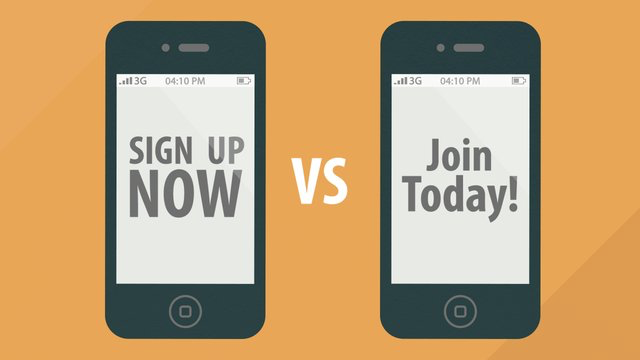


# **4. Design an A/B experiment for the hypothesized scenario to ensure minimum bias?**

We have to work on the implementation part as well. Concept is important as designing , implementation and getting hypothesis tested is also important.

So, In this section, we will implement and see how to do A/B testing using Growdataskills Dataset.

The data was collected for almost 4 months with a control group size of 3332, and a treatment group size of 2996. The homepage actions, the visitors who viewed or clicked the button, were recorded.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)



In [17]:
df = pd.read_csv('homepage_actions.csv')
df.sample(10)

,timestamp,id,group,action
3239,2016-11-10 05:30:36.429300,689564,control,view
3648,2016-11-16 10:42:40.479423,238460,control,view
2971,2016-11-06 11:45:53.577858,412996,experiment,view
1134,2016-10-10 12:53:48.402495,790096,control,click
1858,2016-10-20 19:24:50.636047,925387,experiment,view
60,2016-09-25 10:08:23.700888,370483,experiment,view
7181,2017-01-04 19:07:39.340492,475839,control,view
853,2016-10-06 14:24:22.946179,667335,experiment,view
455,2016-10-01 01:17:37.228365,398733,experiment,view
5830,2016-12-17 03:43:41.887784,186247,control,view


In [18]:
df.shape

(8188, 4)

In [19]:
df.nunique()

timestamp    8188
id           6328
group           2
action          2
dtype: int64

In [20]:
df.groupby('group').nunique()

,timestamp,id,action
group,,,
control,4264,3332,2
experiment,3924,2996,2


In [21]:
df.action.value_counts()

view     6328
click    1860
Name: action, dtype: int64

In [22]:
df.query('action == "click"').id.nunique() / df.query('action == "view"').id.nunique()

0.2939317319848293

In [23]:
df.timestamp.max(), df.timestamp.min()

('2017-01-18 10:24:08.629327', '2016-09-24 17:42:27.839496')

In [10]:
control_df = df.query('group == "control"')

In [24]:
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
control_ctr

0.29160671462829735

In [25]:
experiment_df = df.query('group == "experiment"')
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
experiment_ctr

0.3097463284379172

In [13]:
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644



* The CTR for the control group is 0.2797 and for the treatment group   is 0.3097. An observed difference was then computed between the CTR’s of both the groups and was found to be 0.030.    




In [ ]:
#

In [14]:
diffs = []

for _ in range(10000):
    
    b_samp = df.sample(df.shape[0], replace = True)

    
    control_df = b_sa9mp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')

    
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    
    diffs.append(experiment_ctr - control_ctr)



*   We then simulated the sampling distribution using bootstrapping for the difference in CTR between the two pages over 10,000 iterations.




**Sampling Technique**

*   In statistics, Bootstrap Sampling is a method that involves drawing sample data repeatedly with replacement from a data source to estimate a population parameter.

*   A Sampling Distribution shows every possible result a statistic can take in every possible sample from a population and how often each result happens.






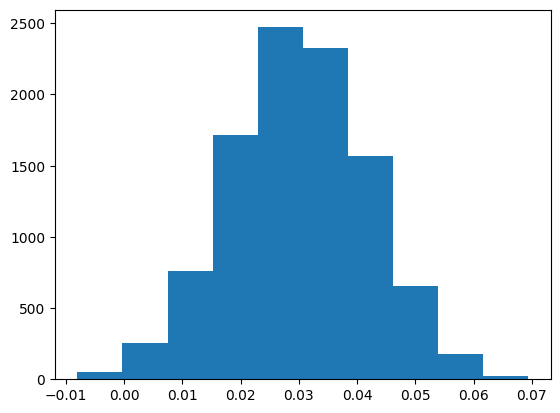

In [26]:
plt.hist(diffs);

In [28]:
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)

In [29]:
null_vals

array([ 0.00289381,  0.00803081,  0.01426437, ...,  0.00765478,
        0.00836652, -0.01111316])

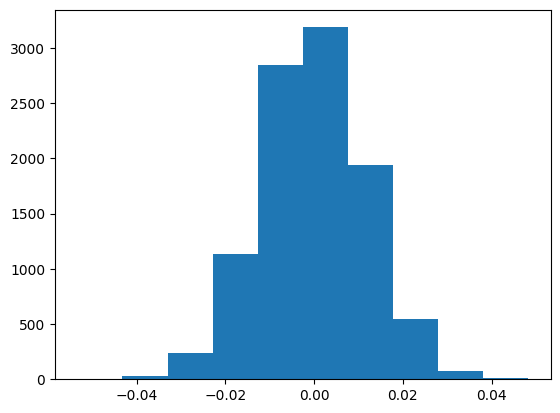

In [10]:
plt.hist(null_vals);

* We used this sampling distribution to simulate the distribution under the null hypothesis, by creating a random normal distribution centered at 0 with the same spread and size.





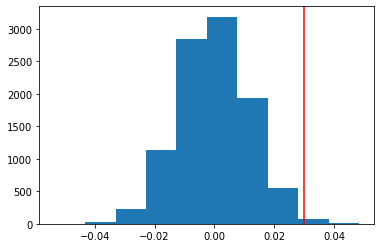

In [ ]:
plt.hist(null_vals);
plt.axvline(x = obs_diff, color = 'red');

* The red line on the sampling distribution under the null hypothesis is the observed difference that we obtained earlier and it seems very small under the null.

In [30]:
p_value=(null_vals > obs_diff).mean()
p_value

0.0052

* We then computed the p-value by finding the mean of values in the null distribution that was greater than our observed difference.

* When our p-value is small, we end up moving with the alternate hypothesis. So, this would be decided based on the threshold value of Type 1 error. The Type 1 error rate alpha for **Business & Research is 0.05.**



* ***The p-value that we obtained is 0.0061, which is less than the error rate alpha. So now we have evidence to reject the null hypothesis. Thus, the A/B testing resulted in the implementation of new Homepage design.***

# **5. Application of Statistics concepts in A/B testing. Explain it using a data-backed hypothetical scenario.**



## **1.	Mean, Median, Mode**
Mean is defiened as the average of a collection of values. You can calculate the mean by dividing the sum of all observations by the number of observations. This is influenced by outliers. It cannot be applied to Nominal Data. We will find only one mean.

Median is the value in a sorted collection of values that separates the no. of values on either side as same. It is not influenced by outliers.It cannot be applied to Nominal Data. We will find only one median.

Mode is defined as the value which occurs with the greatest frequency (or) the most typical value. It is not influenced by outliers.It can be applied to all type of Data. We will find  one or more than one mode.


In [11]:
import numpy as np
from statistics import mode
arr=np.array([1,3,5,6,8,9,4,2,3,3,8])
print("Mean =",np.mean(arr))
print("Median =",np.median(arr))
print("Mode =",mode(arr))

Mean = 4.7272727272727275
Median = 4.0
Mode = 3


## **2. Variance and Standard Deviation**

Variance is represented as how the values ae scattered around it's mean. That means having more scattered will have more variance and vice versa.
Variance is the average variability of our data. The higher the variability, the less precise the mean will be as a predictor of an individual data point.

Standard Deviation is the positive square root of variance and it represents the mangitude of how far are the data points from the mean.



In [12]:
print("Variance =",np.var(arr))
print("Starndard Deviation =",np.std(arr))

Variance = 6.561983471074381
Starndard Deviation = 2.561636873382795


## **3. Population and Sampling**
Population is otherwise known as the superset where we have billion of deta. Thus we can't work with them due to high computational costs or due to unavaliability of all data points for the population.

So using Sampling we used to take a sample from the population, work on that sample data and will relate the result with the population one using various statistical methods. Since we can’t measure the “true conversion rate,” we have to select a sample that’s statistically representative of the whole.

Here I am going to describe various sampling techniques.

**Simple Random Sampling**

Sampling based of picking randomly from the population.

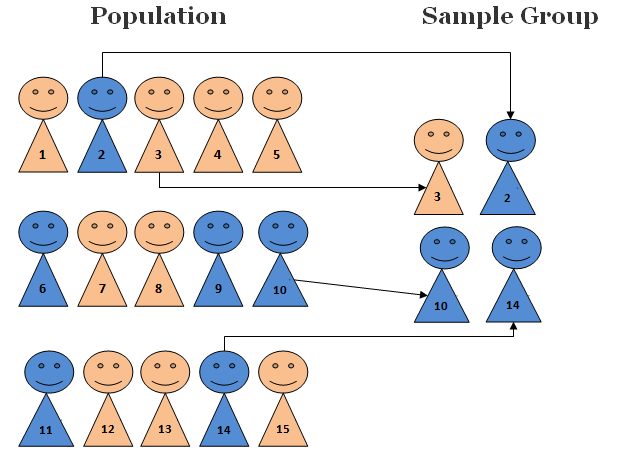

In [13]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(5000, 4), columns=list('ABCD'))

In [14]:
sample_df = df.sample(100)

In [15]:
sample_df.shape

(100, 4)

**Stratified Sampling**

Sampling based on ratio present in original population.

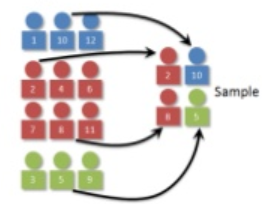

In [16]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, ## we need one categorical variable for that
                                                    test_size=0.25)

NameError: name 'X' is not defined

## **4. Hypothesis and Hypothesis Testing**



A hypothesis can be defined as a proposed explanation for a phenomenon. It is not the absolute truth but a provisional working assumption. It is called a hypothesis because it is not known whether or not it is true.

There are two types of hypothesis.

Null hypothesis is a statement that the value of a population parameter like mean or proportion  is equal to some claimed value. We can either reject the null hypothesis or fail to reject the null hypothesis.

The alternative hypothesis is the statement that the statistics has a value that somehow differes from the null hypothesis.

A hypothesis test is a standard procedure for testing a claim about a property of a population.

Ex: Hypothesis:- The average starting salary for a data scientist is at least 10LPA.

Null Hypothesis (H0): mean>= 7LPA

Alternative Hypothesis (H1): mean< 7LPA


## **5. Statistical significance**

Statistical significance is the likelihood that the difference in conversion rates between a given variation and the baseline is not due to random chance. That means an event can't be occur by chance. There is a statistics behind every event.A result of an experiment is said to have statistical significance, or be statistically significant, if it is likely not caused by chance for a given statistical significance level.

For example, if you run an A/B testing experiment with a significance level of 95%, this meansIf there is a probablity of being winner is 95% at the same time there is also a probabilyu of 5% to not to be winner.
Statistical Significance can reject the null hypothesis but it hasn't the power to accept the alternative hypothesis.

Statistical significance is a way of mathematically proving that a certain statistic is reliable. When you make decisions based on the results of experiments that you’re running, you will want to make sure that a relationship actually exists.

## **6. P-values**

P-value is the probability of getting a value of the test statistic that is at least as extreme as the one representing the sample data, assuming that the null hypothesis is true. The null hypothesis is rejected if the p-value is very small such as smaller than a significance level of 0.05% Otherwise we will able to fail to reject the null hypothesis if p-value is greater than significance level.

If a p-value is small enough,  then, we say the results are statistically significant.

In [ ]:
import numpy as np
import seaborn as sns
from scipy.stats import *
import math

In [ ]:
#helper functions
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [ ]:
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)

In [ ]:
findz = findz()

In [ ]:
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

In [ ]:
zcdf = lambda x: norm(0,1).cdf(x)

In [ ]:
def p_value(z,tailed):
  z=zcdf(z)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

Example : <br>


*   Sample mean = 105
*   Sample Size = 50
* Sampple stdev = 20
* Hypothesis mean = 100
* p>100
* Right Tailed


1. Null Hypothesis : p=100
2. Alternate Hypotesis : p>100
3. Critical Value : alpha = 0.05 :: p < 0.05
4. Identify p value
5. Conclusion


In [ ]:
hypothesis_mean = 100
sample_mean = 105
std = 20
size = 50

In [ ]:
z = findz.mean(hypothesis_mean,sample_mean,size,std)

In [ ]:
p = p_value(z,'r') #right tailed test

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


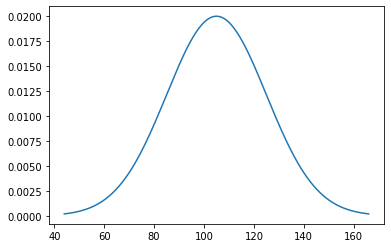

In [ ]:
x = np.linspace(44,166,200)
y = norm.pdf(x,105,20)
sns.lineplot(x,y)

In [ ]:
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0385499358717708


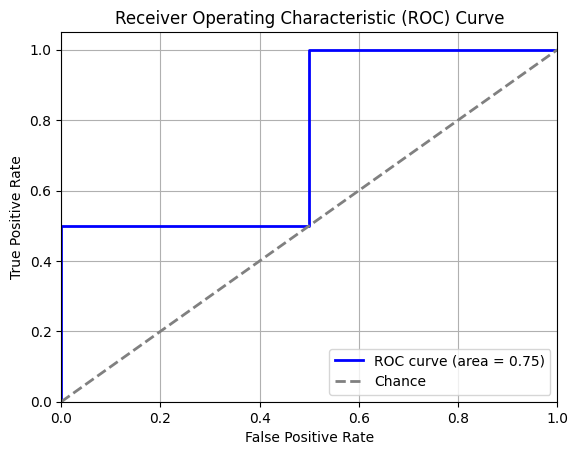

FPR: [0.  0.  0.5 0.5 1. ]
TPR: [0.  0.5 0.5 1.  1. ]
AUC: 0.75


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Example data
y_true = [0, 0, 1, 1]  # True binary labels
y_scores = [0.1, 0.4, 0.35, 0.8]  # Predicted probabilities

# Compute the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores)

# Compute the AUC
auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print("FPR:", fpr)
print("TPR:", tpr)
print("AUC:", auc)
